In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [412]:
df=pd.read_csv('insurance.csv')

In [413]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [414]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [415]:
df.shape

(1338, 7)

In [416]:
print('Number of Rows is: ',df.shape[0])
print('Number of Columns is: ',df.shape[1])

Number of Rows is:  1338
Number of Columns is:  7


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [418]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [419]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [420]:
numerical_columns=[]
for column in df.columns:
    if df[column].dtype!='object':
        numerical_columns.append(column)

In [421]:
numerical_columns

['age', 'bmi', 'children', 'charges']

In [422]:
categorical_columns=[]
for column in df.columns:
    if df[column].dtype=='object':
        categorical_columns.append(column)

In [423]:
categorical_columns

['sex', 'smoker', 'region']

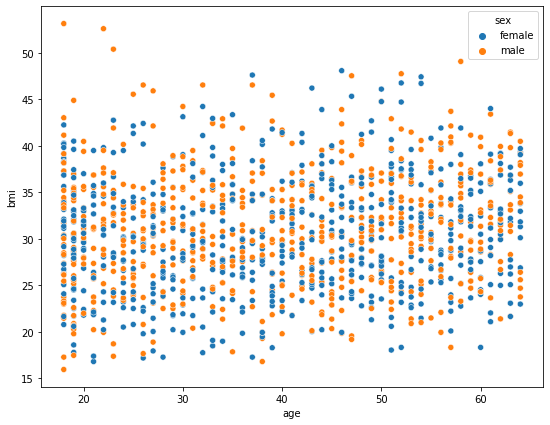

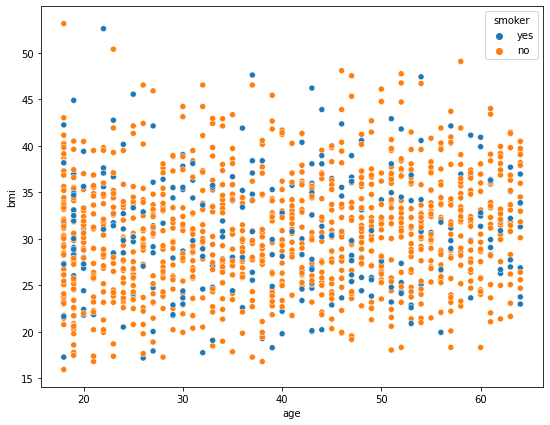

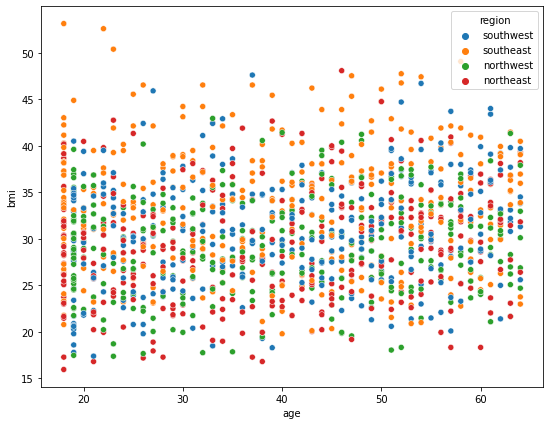

In [424]:
for i in categorical_columns:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='age',y='bmi',hue=i)
    plt.show()

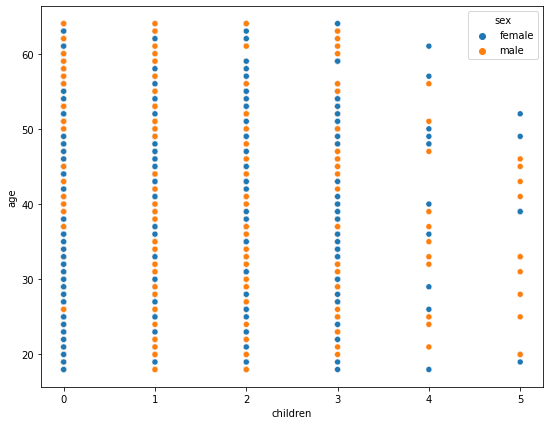

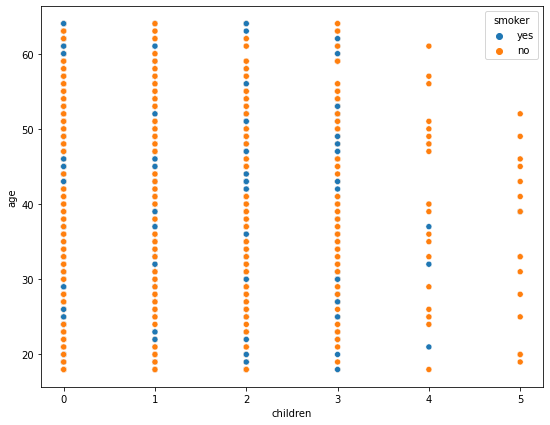

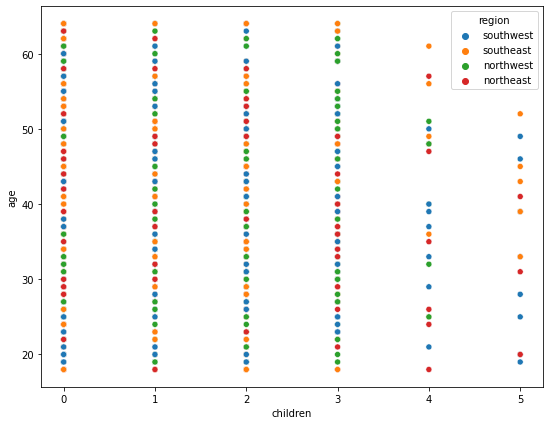

In [425]:
for i in categorical_columns:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='children',y='age',hue=i)
    plt.show()

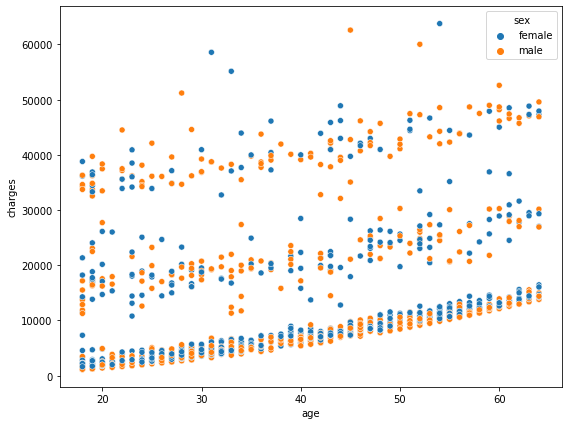

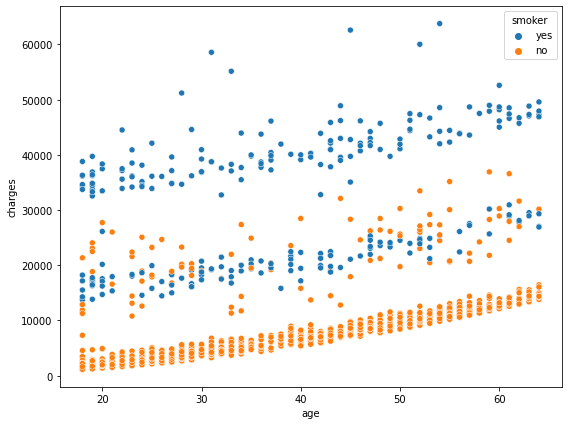

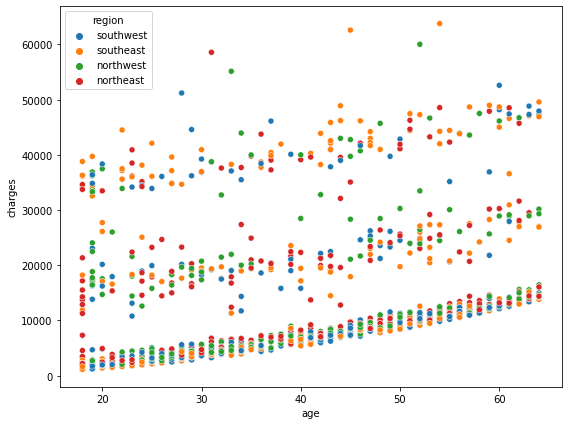

In [426]:
for i in categorical_columns:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='age',y='charges',hue=i)
    plt.show()

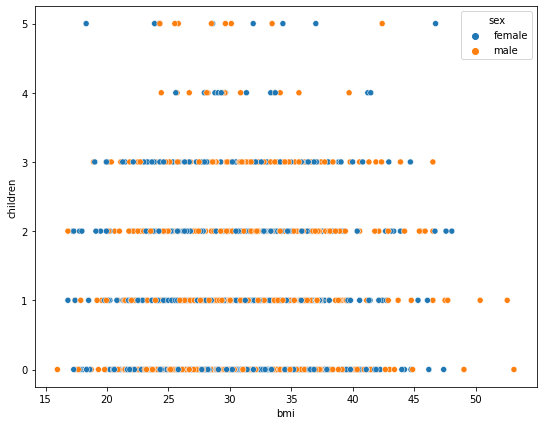

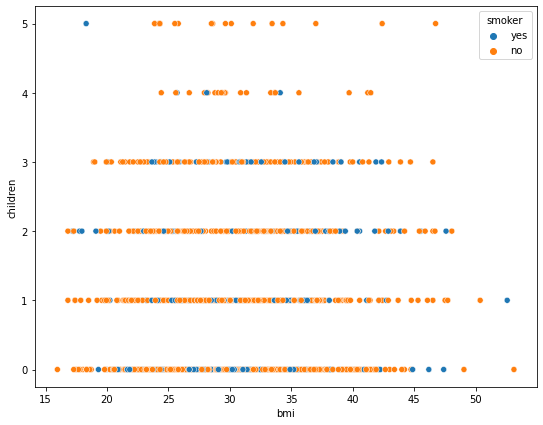

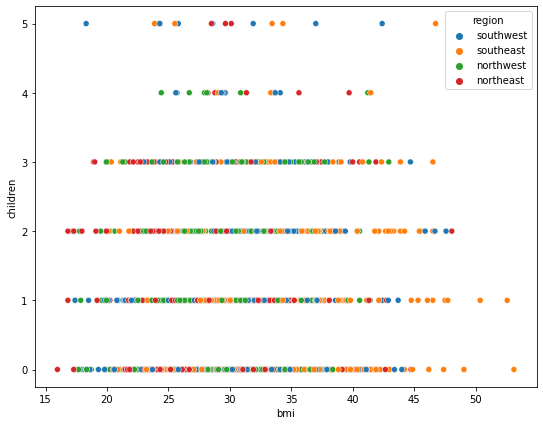

In [427]:
for i in categorical_columns:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='bmi',y='children',hue=i)
    plt.show()

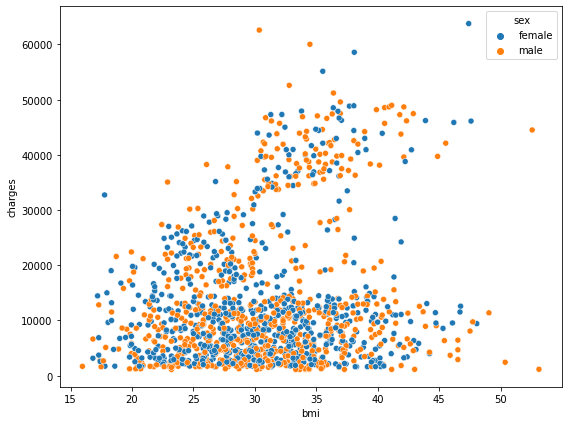

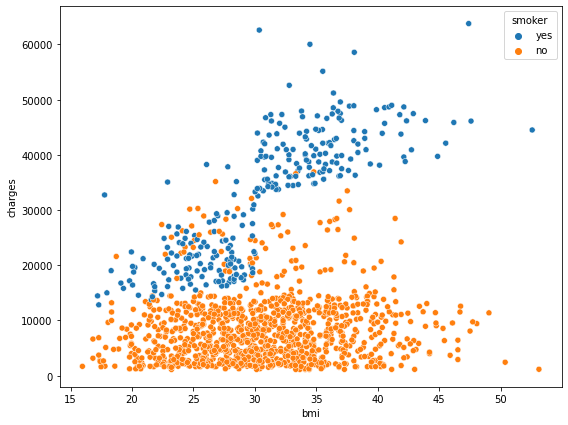

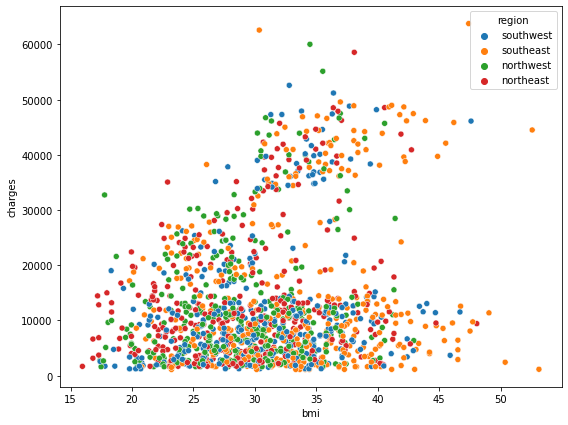

In [428]:
for i in categorical_columns:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='bmi',y='charges',hue=i)
    plt.show()

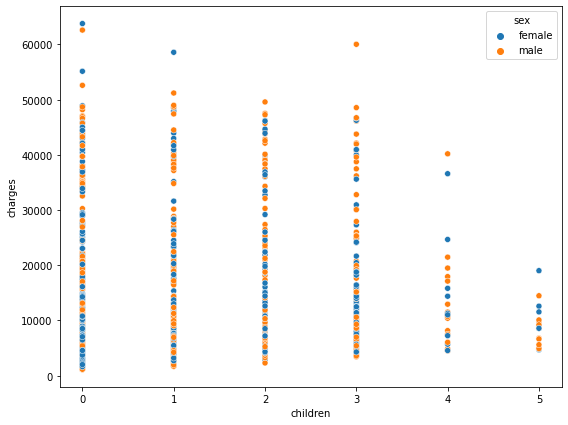

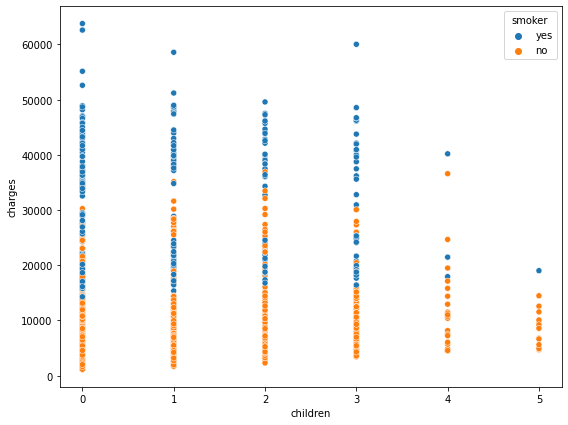

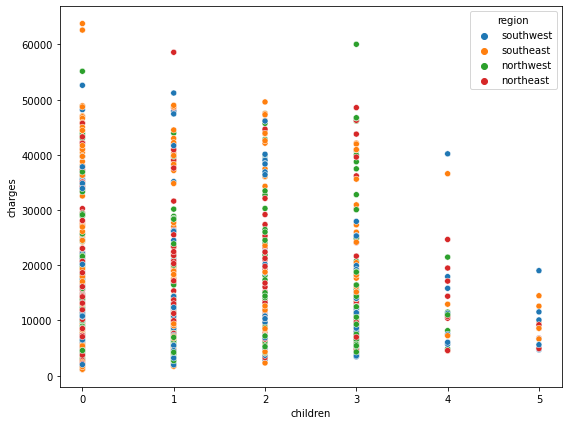

In [429]:
for i in categorical_columns:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='children',y='charges',hue=i)
    plt.show()

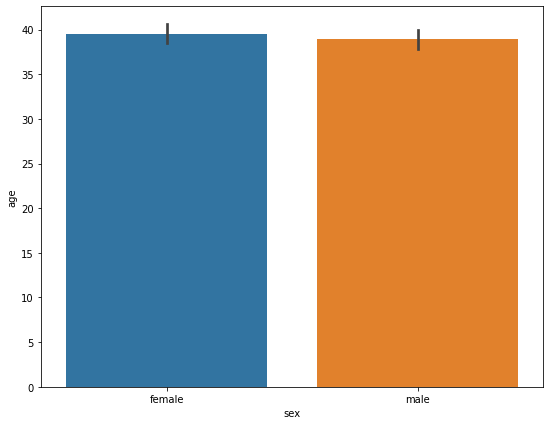

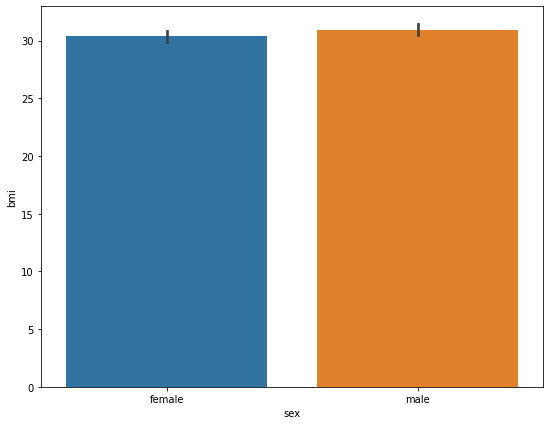

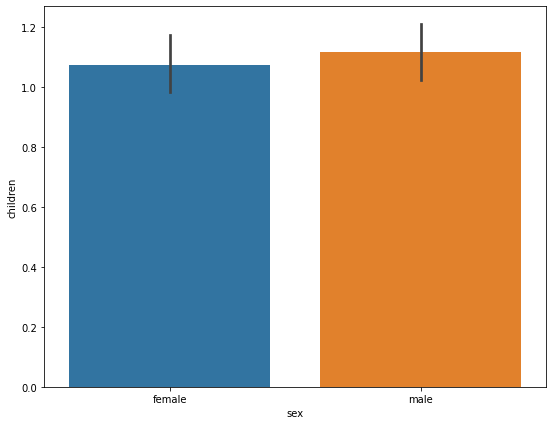

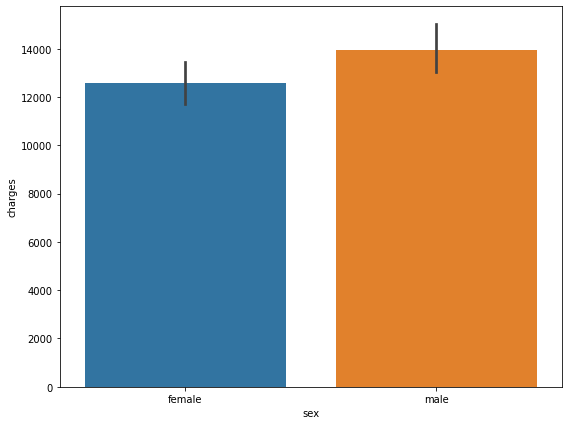

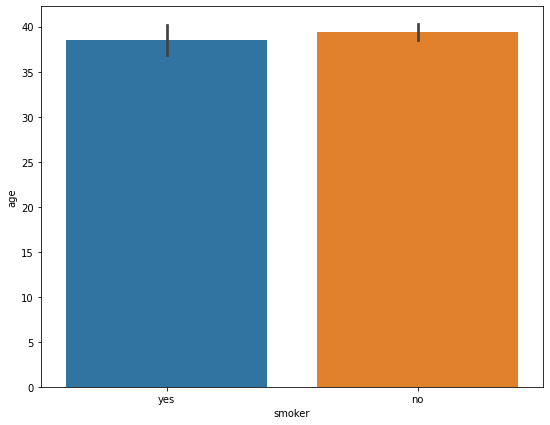

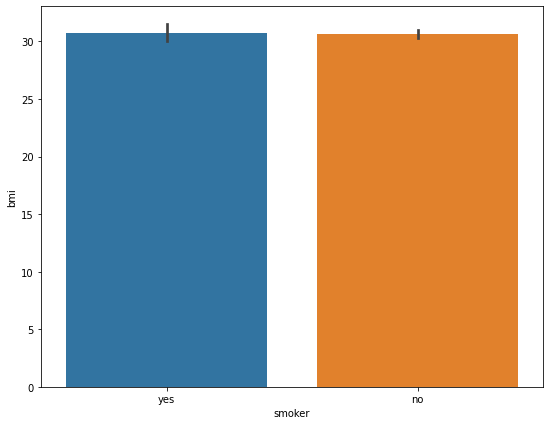

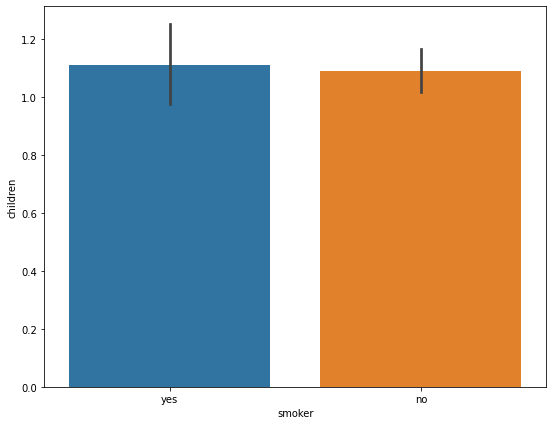

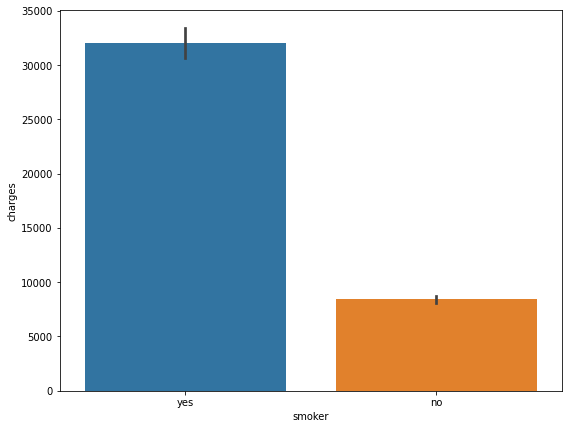

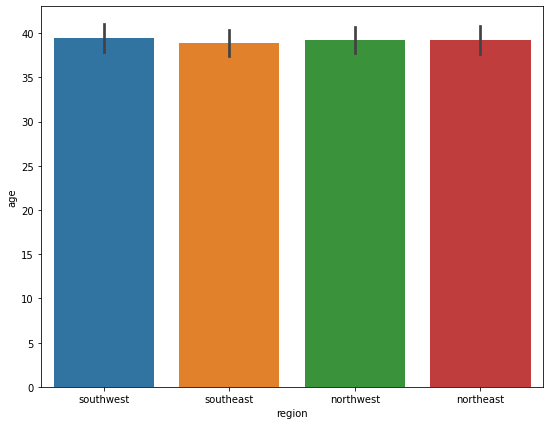

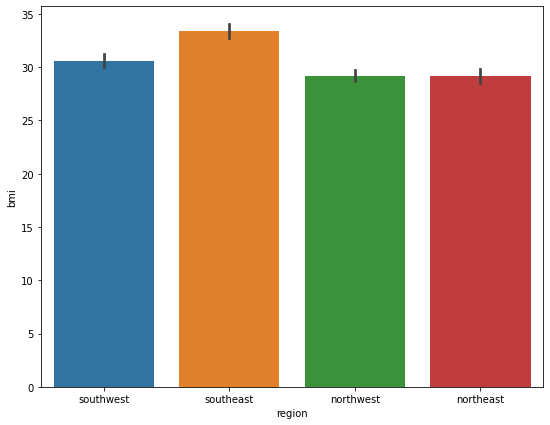

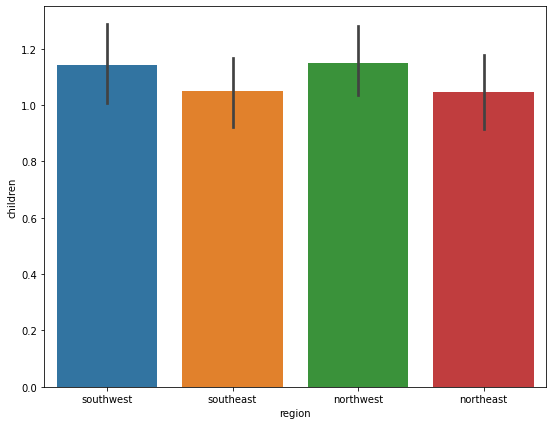

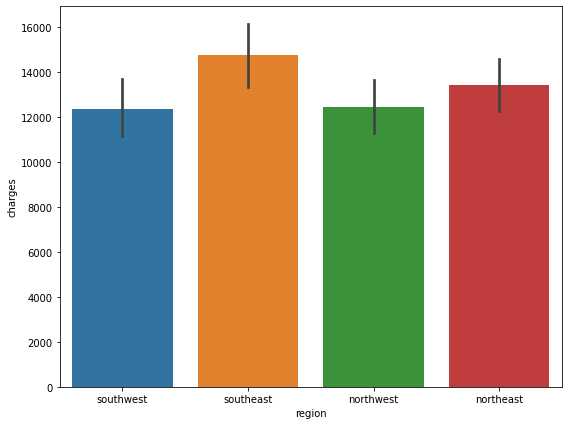

In [430]:
for i in categorical_columns:
    for j in numerical_columns:
        plt.figure(figsize=(9,7))
        sns.barplot(data=df,x=i,y=j)
        plt.show()

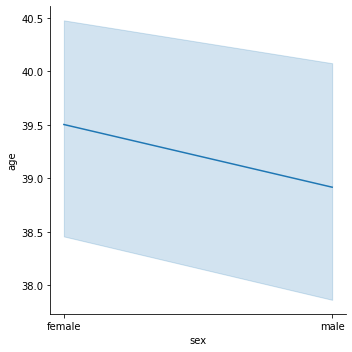

In [431]:
sns.relplot(data=df,x='sex',y='age',kind='line')
plt.show()

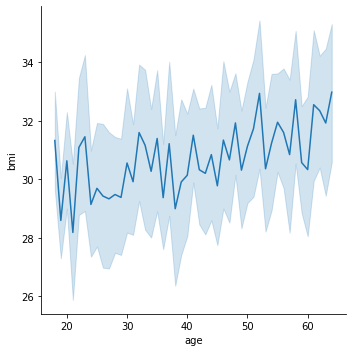

In [432]:
sns.relplot(data=df,x='age',y='bmi',kind='line')
plt.show()

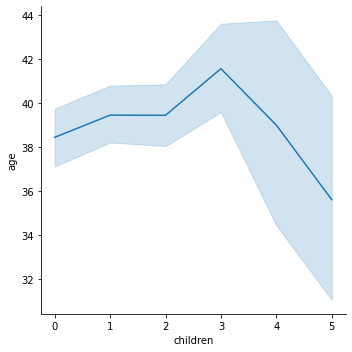

In [433]:
sns.relplot(data=df,x='children',y='age',kind='line')
plt.show()

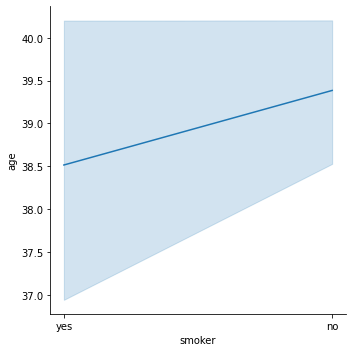

In [434]:
sns.relplot(data=df,x='smoker',y='age',kind='line')
plt.show()

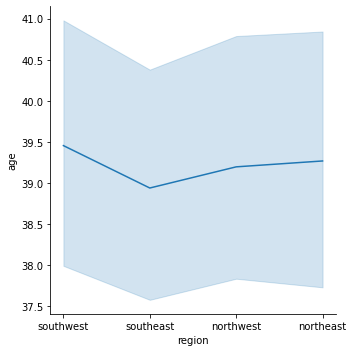

In [435]:
sns.relplot(data=df,x='region',y='age',kind='line')
plt.show()

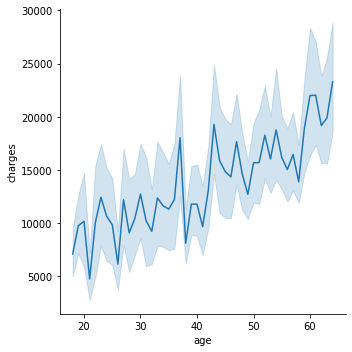

In [436]:
sns.relplot(data=df,x='age',y='charges',kind='line')
plt.show()

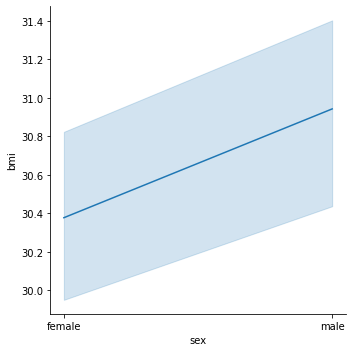

In [437]:
sns.relplot(data=df,x='sex',y='bmi',kind='line')
plt.show()

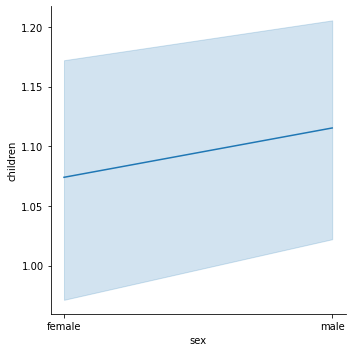

In [438]:
sns.relplot(data=df,x='sex',y='children',kind='line')
plt.show()

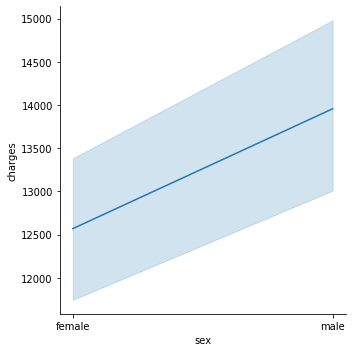

In [439]:
sns.relplot(data=df,x='sex',y='charges',kind='line')
plt.show()

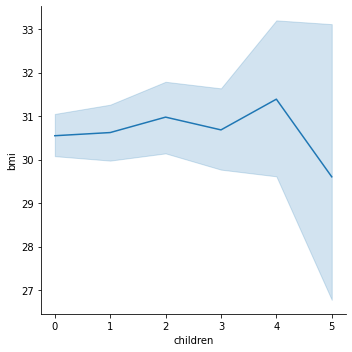

In [440]:
sns.relplot(data=df,x='children',y='bmi',kind='line')
plt.show()

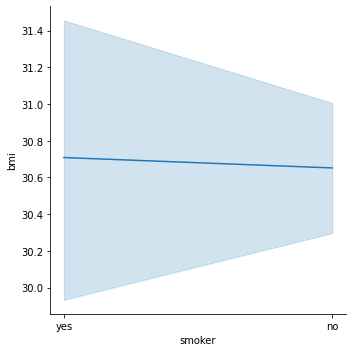

In [441]:
sns.relplot(data=df,x='smoker',y='bmi',kind='line')
plt.show()

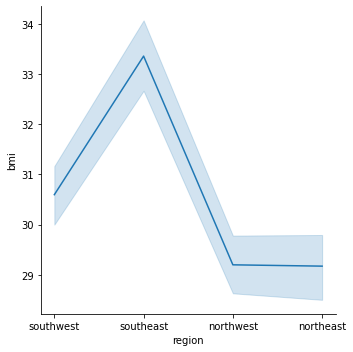

In [442]:
sns.relplot(data=df,x='region',y='bmi',kind='line')
plt.show()

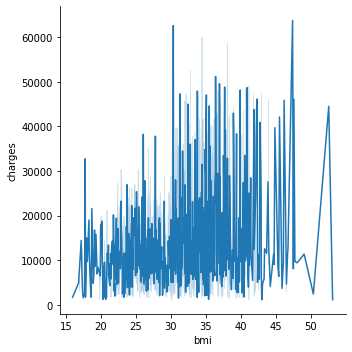

In [443]:
sns.relplot(data=df,x='bmi',y='charges',kind='line')
plt.show()

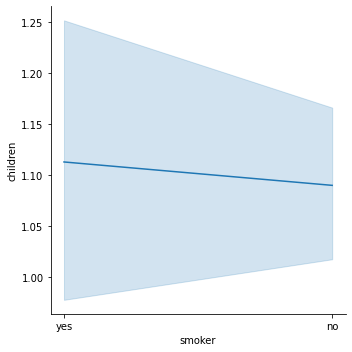

In [444]:
sns.relplot(data=df,x='smoker',y='children',kind='line')
plt.show()

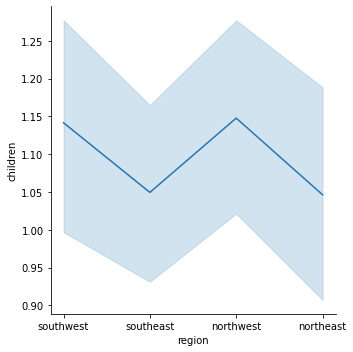

In [445]:
sns.relplot(data=df,x='region',y='children',kind='line')
plt.show()

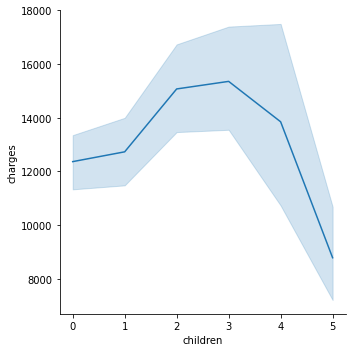

In [446]:
sns.relplot(data=df,x='children',y='charges',kind='line')
plt.show()

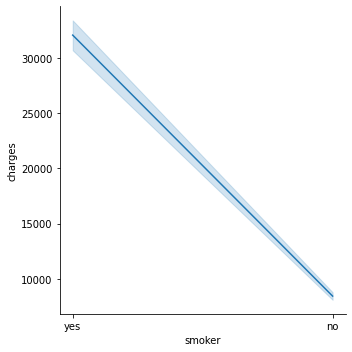

In [447]:
sns.relplot(data=df,x='smoker',y='charges',kind='line')
plt.show()

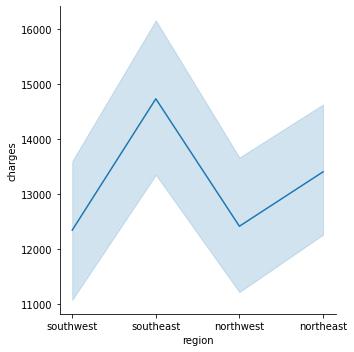

In [448]:
sns.relplot(data=df,x='region',y='charges',kind='line')
plt.show()

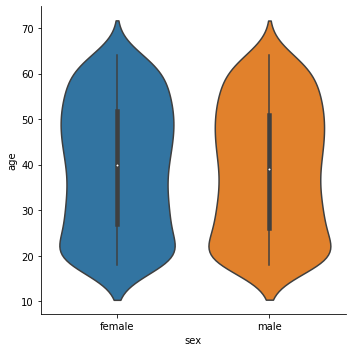

In [449]:
sns.catplot(data=df,x='sex',y='age',kind='violin')
plt.show()

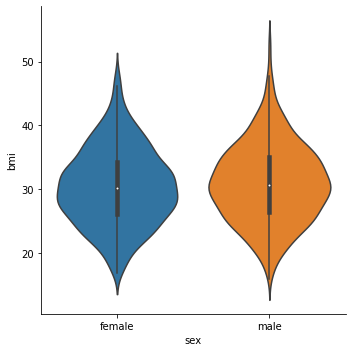

In [450]:
sns.catplot(data=df,x='sex',y='bmi',kind='violin')
plt.show()

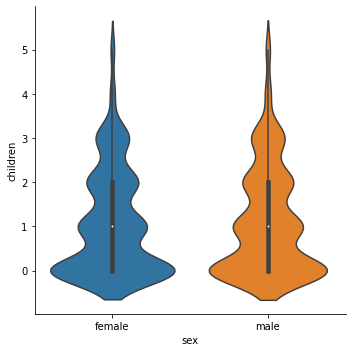

In [451]:
sns.catplot(data=df,x='sex',y='children',kind='violin')
plt.show()

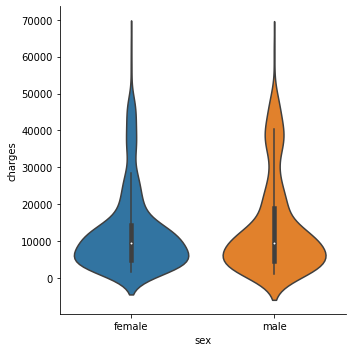

In [452]:
sns.catplot(data=df,x='sex',y='charges',kind='violin')
plt.show()

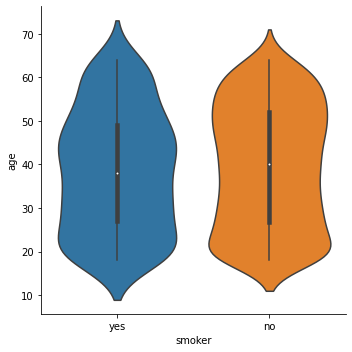

In [453]:
sns.catplot(data=df,x='smoker',y='age',kind='violin')
plt.show()

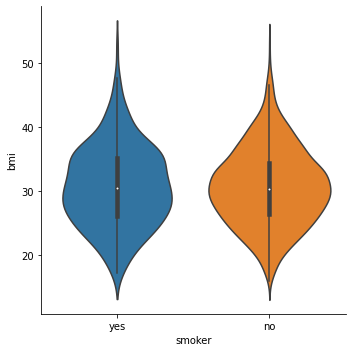

In [454]:
sns.catplot(data=df,x='smoker',y='bmi',kind='violin')
plt.show()

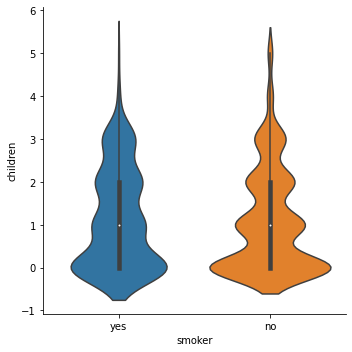

In [455]:
sns.catplot(data=df,x='smoker',y='children',kind='violin')
plt.show()

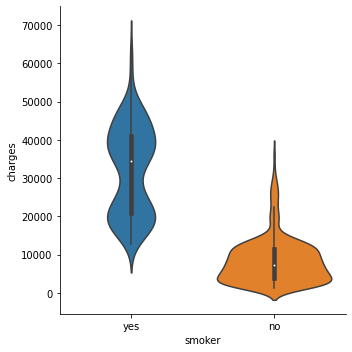

In [456]:
sns.catplot(data=df,x='smoker',y='charges',kind='violin')
plt.show()

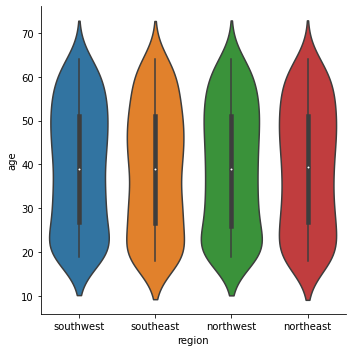

In [457]:
sns.catplot(data=df,x='region',y='age',kind='violin')
plt.show()

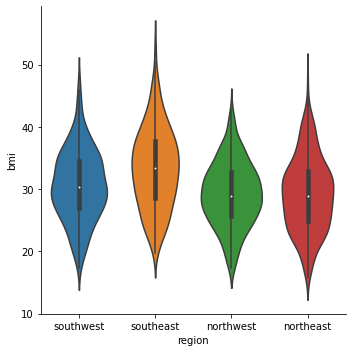

In [458]:
sns.catplot(data=df,x='region',y='bmi',kind='violin')
plt.show()

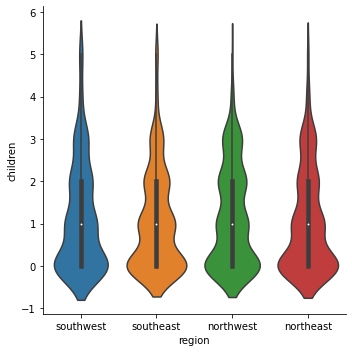

In [459]:
sns.catplot(data=df,x='region',y='children',kind='violin')
plt.show()

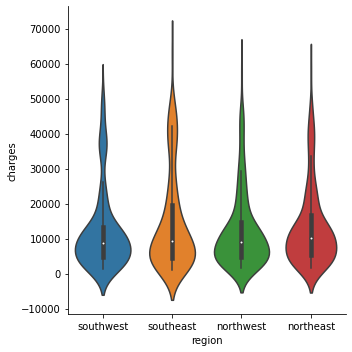

In [460]:
sns.catplot(data=df,x='region',y='charges',kind='violin')
plt.show()

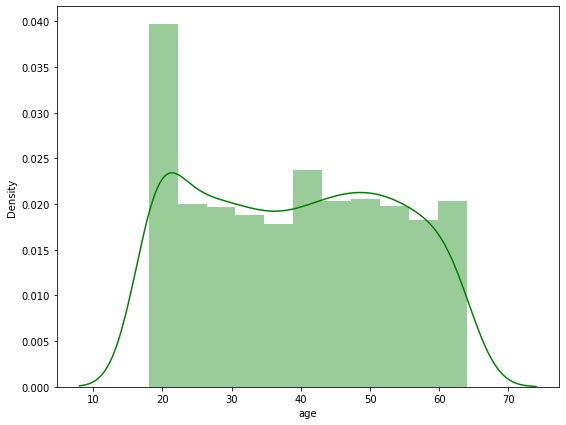

In [461]:
plt.figure(figsize=(9,7))
sns.distplot(df['age'],color='green')
plt.show()

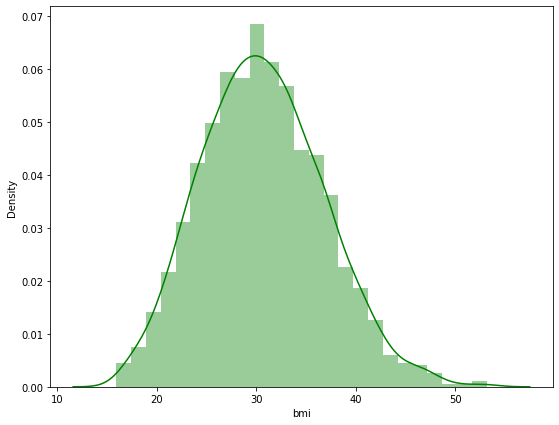

In [462]:
plt.figure(figsize=(9,7))
sns.distplot(df['bmi'],color='green')
plt.show()

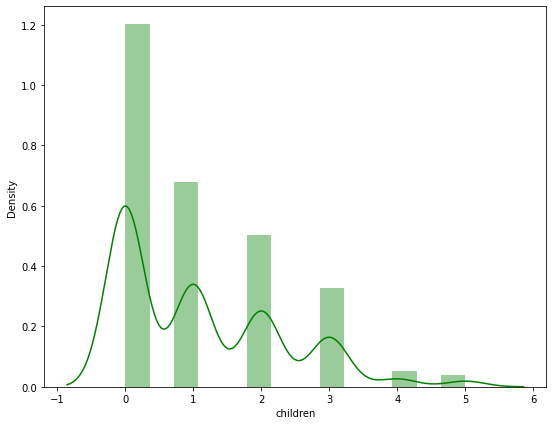

In [463]:
plt.figure(figsize=(9,7))
sns.distplot(df['children'],color='green')
plt.show()

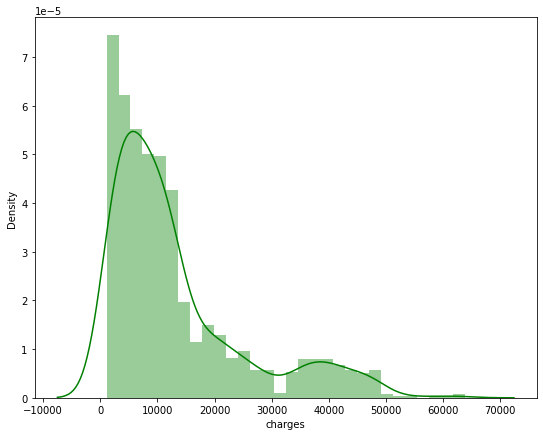

In [464]:
plt.figure(figsize=(9,7))
sns.distplot(df['charges'],color='green')
plt.show()

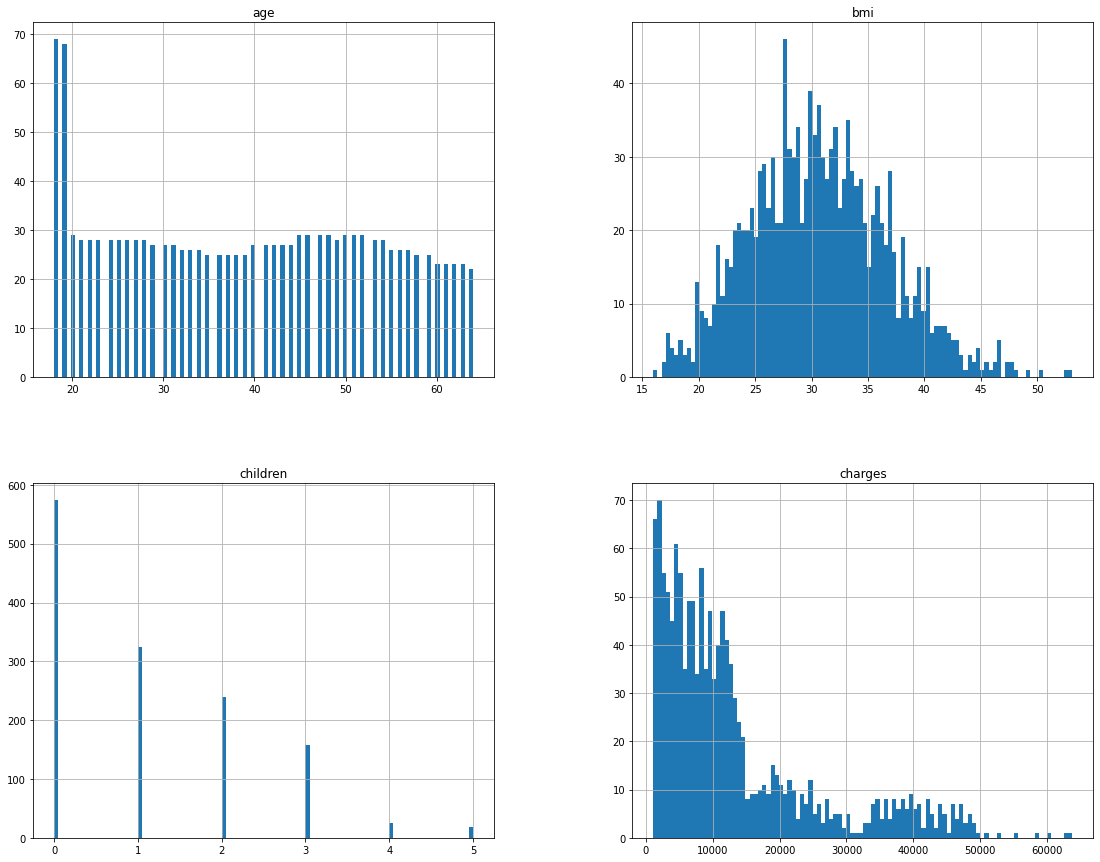

In [465]:
df[numerical_columns].hist(bins=100,figsize=(19,15))
plt.show()

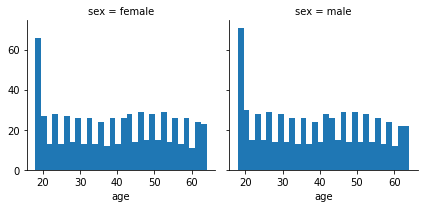

In [466]:
b=sns.FacetGrid(data=df,col='sex')
b.map(plt.hist,'age',bins=30)
plt.show()

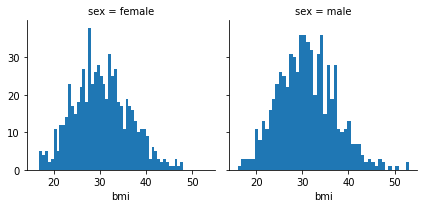

In [467]:
b=sns.FacetGrid(data=df,col='sex')
b.map(plt.hist,'bmi',bins=50)
plt.show()

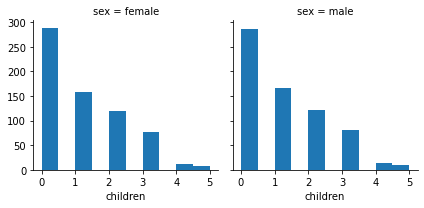

In [468]:
b=sns.FacetGrid(data=df,col='sex')
b.map(plt.hist,'children',bins=10)
plt.show()

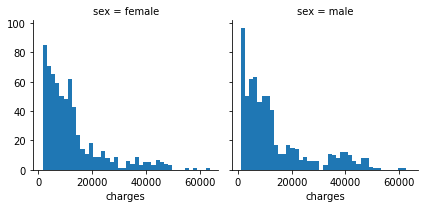

In [469]:
b=sns.FacetGrid(data=df,col='sex')
b.map(plt.hist,'charges',bins=40)
plt.show()

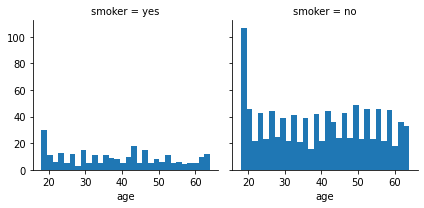

In [470]:
b=sns.FacetGrid(data=df,col='smoker')
b.map(plt.hist,'age',bins=30)
plt.show()

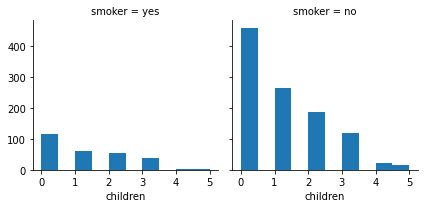

In [471]:
b=sns.FacetGrid(data=df,col='smoker')
b.map(plt.hist,'children',bins=10)
plt.show()

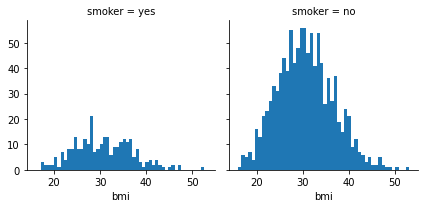

In [472]:
b=sns.FacetGrid(data=df,col='smoker')
b.map(plt.hist,'bmi',bins=50)
plt.show()

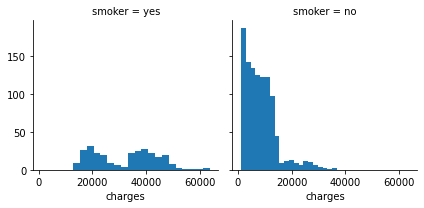

In [473]:
b=sns.FacetGrid(data=df,col='smoker')
b.map(plt.hist,'charges',bins=20)
plt.show()

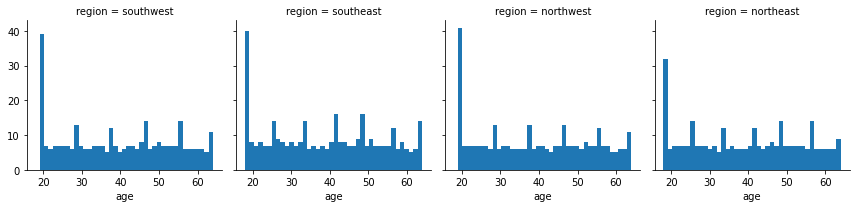

In [474]:
b=sns.FacetGrid(data=df,col='region')
b.map(plt.hist,'age',bins=40)
plt.show()

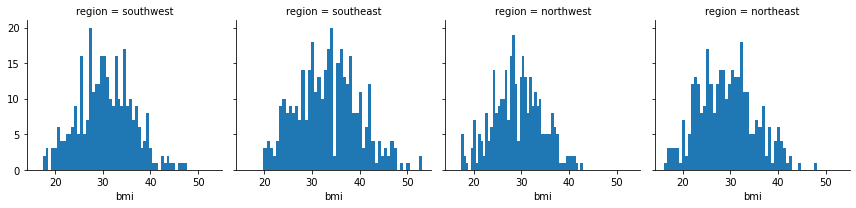

In [475]:
b=sns.FacetGrid(data=df,col='region')
b.map(plt.hist,'bmi',bins=50)
plt.show()

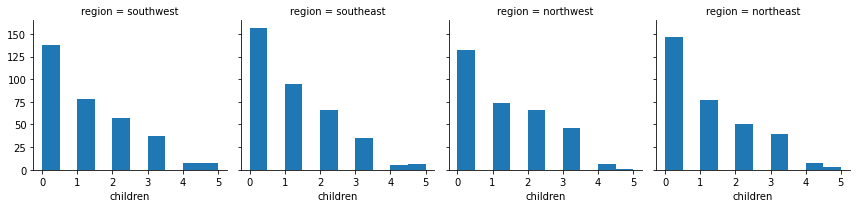

In [476]:
b=sns.FacetGrid(data=df,col='region')
b.map(plt.hist,'children',bins=10)
plt.show()

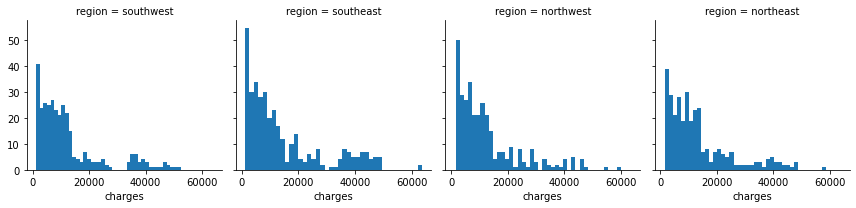

In [477]:
b=sns.FacetGrid(data=df,col='region')
b.map(plt.hist,'charges',bins=40)
plt.show()

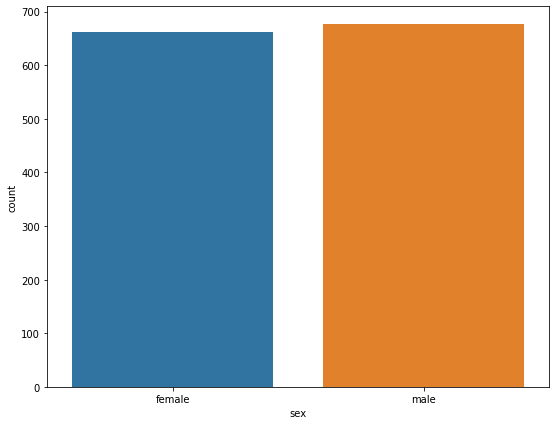

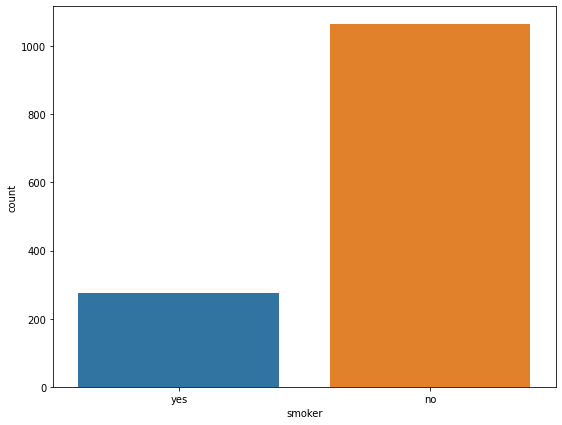

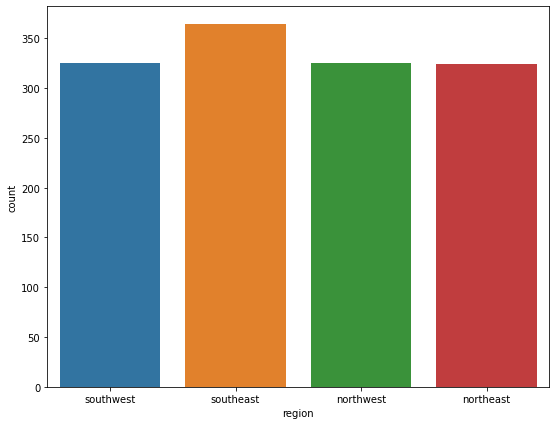

In [478]:
for i in categorical_columns:
    plt.figure(figsize=(9,7))
    sns.countplot(data=df,x=i)
    plt.show()

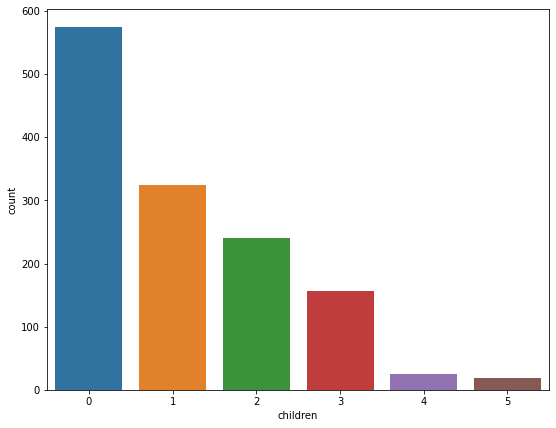

In [479]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='children')
plt.show()

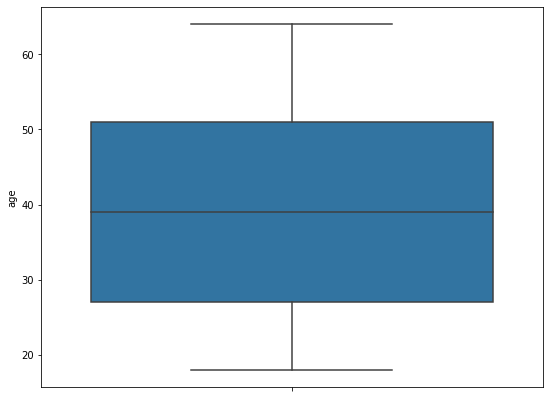

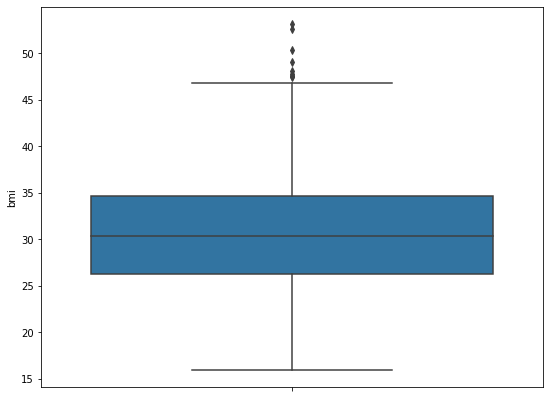

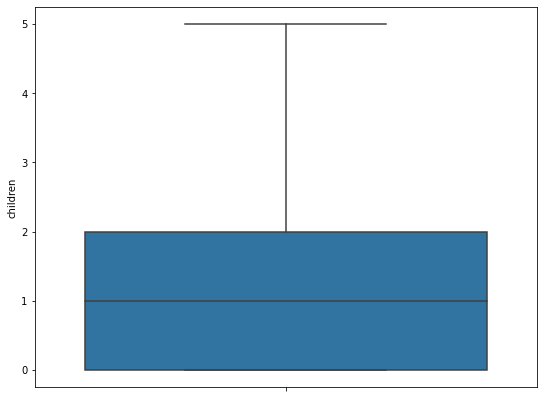

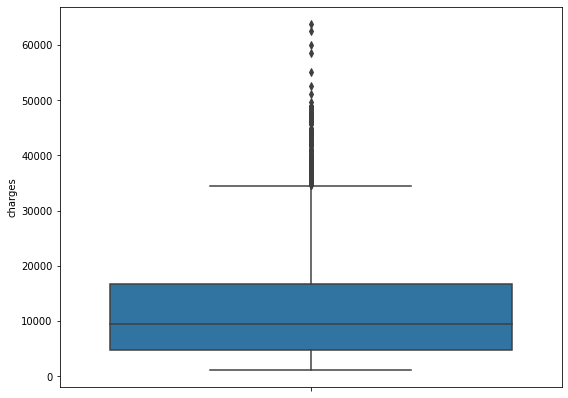

In [480]:
for i in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.boxplot(data=df,y=i)
    plt.show()

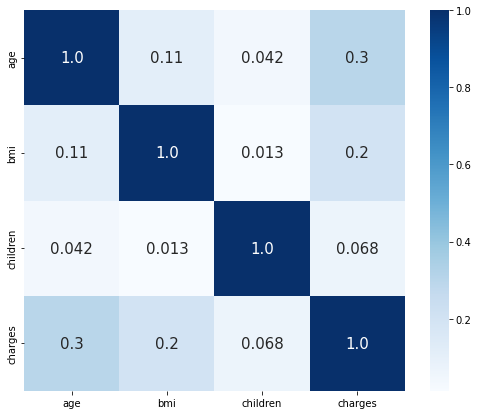

In [481]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='.2',cmap='Blues')
plt.show()

In [482]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1336,21,female,25.800,0,no,southwest,2007.94500
931,39,female,32.500,1,no,southwest,6238.29800
448,40,female,29.600,0,no,southwest,5910.94400
187,30,female,30.900,3,no,southwest,5325.65100
347,46,male,33.345,1,no,northeast,8334.45755


In [483]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [484]:
df['sex']=df['sex'].map({'male':0,'female':1})

In [485]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1279,25,1,26.79,2,no,northwest,4189.1131
671,29,1,31.16,0,no,northeast,3943.5954
928,62,1,39.16,0,no,southeast,13470.8044
41,31,1,36.63,2,no,southeast,4949.7587
441,33,1,33.50,0,yes,southwest,37079.3720


In [486]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [487]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [488]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
877,33,0,33.440,5,0,southeast,6653.78860
1178,23,1,34.865,0,0,northeast,2899.48935
1335,18,1,36.850,0,0,southeast,1629.83350
358,23,0,41.910,0,0,southeast,1837.28190
84,37,1,34.800,2,1,southwest,39836.51900


In [489]:
df=pd.get_dummies(data=df,columns=['region'],drop_first=True,dtype='int')

In [490]:
df.sample(5)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
624,59,0,28.785,0,0,12129.61415,1,0,0
162,54,0,39.600,1,0,10450.55200,0,0,1
1005,29,0,31.730,2,0,4433.38770,1,0,0
31,18,1,26.315,0,0,2198.18985,0,0,0
309,41,1,33.060,2,0,7749.15640,1,0,0


In [491]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [492]:
X=df.drop(columns=['charges'],axis='columns')
y=df['charges']

In [493]:
X

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,0,0
1334,18,1,31.920,0,0,0,0,0
1335,18,1,36.850,0,0,0,1,0
1336,21,1,25.800,0,0,0,0,1


In [494]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [495]:
X.std().mean()

2.945083154517452

In [496]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [497]:
X_scaled

array([[-1.43876426,  1.0105187 , -0.45332   , ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545, -0.98959079,  0.5096211 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355, -0.98959079,  0.38330685, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188,  1.0105187 , -0.79781341, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573,  1.0105187 , -0.26138796, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [498]:
X_scaled.std().mean()

1.0

In [499]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,shuffle=True)

In [500]:
X_train

array([[ 0.48366788,  1.0105187 , -1.75747362, ...,  1.76548098,
        -0.61132367, -0.56641788],
       [ 0.55486907,  1.0105187 , -1.04059924, ..., -0.56641788,
        -0.61132367, -0.56641788],
       [ 0.91087502,  1.0105187 , -0.95201522, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [ 1.33808216, -0.98959079, -0.90034121, ..., -0.56641788,
        -0.61132367, -0.56641788],
       [-0.15714284,  1.0105187 ,  2.77835626, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.12447859, -0.98959079, -0.12523104, ..., -0.56641788,
        -0.61132367,  1.76548098]])

In [501]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [502]:
model=GradientBoostingRegressor(max_depth=3,learning_rate=0.08)

In [503]:
model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.08)

In [504]:
y_predict=model.predict(X_test)

In [506]:
r2_s=r2_score(y_predict,y_test)
MAE=mean_absolute_error(y_predict,y_test)
RMSE=np.sqrt(mean_squared_error(y_predict,y_test))
print('R2 Score: ',r2_s)
print('Mean Absolute Error: ',MAE)
print('RMSE: ',RMSE)

R2 Score:  0.8635084124085165
Mean Absolute Error:  2446.352646892997
RMSE:  4303.633118627173
